<a href="https://colab.research.google.com/github/jazu1412/PYCARET_LOWCODE_ML/blob/main/breast_cancer_classification_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification Using PyCaret

This notebook demonstrates how to perform binary classification on the Breast Cancer dataset using PyCaret. We'll go through the process of loading the data, setting up the classification experiment, comparing models, tuning the best model, and making predictions.

Dataset source: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [18]:
# Install required libraries
!pip install pycaret
!pip install gradio

In [19]:
# Import necessary libraries
import pandas as pd
import gradio as gr
import io
from pycaret.classification import *
from google.colab import files

In [20]:
# Upload and load the dataset
uploaded_files = files.upload()
dataset_filename = list(uploaded_files.keys())[0]
cancer_df = pd.read_csv(io.BytesIO(uploaded_files[dataset_filename]))

# Display the first few rows of the dataset
print(cancer_df.head())

Saving breast-cancer.csv to breast-cancer (1).csv
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radi

## Set up the Classification Experiment

We'll use PyCaret to set up our classification experiment, specifying 'diagnosis' as our target variable.

In [21]:
# Initialize PyCaret's classification setup
cancer_exp = setup(data=cancer_df, target='diagnosis', session_id=456, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,456
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 32)"
5,Transformed data shape,"(569, 32)"
6,Transformed train set shape,"(398, 32)"
7,Transformed test set shape,"(171, 32)"
8,Numeric features,31
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

## Compare Different Models

We'll compare various classification models to find the best performing one for our dataset.

In [22]:
# Compare different models
top_model = compare_models()
print("Best model:", top_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9649,0.9874,0.9649,0.9668,0.9647,0.9243,0.9267,0.2400
lightgbm,Light Gradient Boosting Machine,0.9624,0.9872,0.9624,0.9637,0.9620,0.9182,0.9203,0.1430
et,Extra Trees Classifier,0.9623,0.9893,0.9623,0.9632,0.9620,0.9181,0.9196,0.3740
xgboost,Extreme Gradient Boosting,0.9574,0.9908,0.9574,0.9588,0.9572,0.9084,0.9102,0.3060
gbc,Gradient Boosting Classifier,0.9548,0.9877,0.9548,0.9566,0.9544,0.9018,0.9045,0.5980
ridge,Ridge Classifier,0.9523,0.9899,0.9523,0.9554,0.9517,0.8961,0.9003,0.0660
lda,Linear Discriminant Analysis,0.9523,0.9867,0.9523,0.9550,0.9515,0.8952,0.8994,0.0840
rf,Random Forest Classifier,0.9498,0.9892,0.9498,0.9520,0.9492,0.8905,0.8938,0.4110
qda,Quadratic Discriminant Analysis,0.9448,0.9928,0.9448,0.9476,0.9449,0.8826,0.8853,0.0440
lr,Logistic Regression,0.9297,0.9868,0.9297,0.9316,0.9296,0.8493,0.8515,0.2250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Best model: AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=456)


## Create and Evaluate a Specific Model

Let's create a Random Forest model and evaluate its performance using cross-validation.

In [23]:
# Create a Random Forest model
rf_classifier = create_model('rf')

# Evaluate model performance using cross-validation
evaluate_model(rf_classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,1.0000,0.9750,0.9760,0.9748,0.9459,0.9473
1,0.8750,0.9813,0.8750,0.8795,0.8716,0.7222,0.7325
2,0.9500,0.9973,0.9500,0.9500,0.9500,0.8933,0.8933
3,0.9250,0.9760,0.9250,0.9330,0.9230,0.8333,0.8452
4,0.9750,0.9973,0.9750,0.9766,0.9751,0.9474,0.9487
5,0.9500,0.9560,0.9500,0.9500,0.9500,0.8933,0.8933
6,0.9500,0.9973,0.9500,0.9500,0.9500,0.8933,0.8933
7,0.9750,1.0000,0.9750,0.9760,0.9748,0.9459,0.9473
8,0.9487,0.9871,0.9487,0.9525,0.9477,0.8850,0.8909


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Tune the Model

Now, let's tune the hyperparameters of our Random Forest model to improve its performance.

In [24]:
# Tune hyperparameters of the Random Forest model
optimized_rf = tune_model(rf_classifier)
print("Tuned Random Forest Model:", optimized_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,1.0000,0.9750,0.9760,0.9748,0.9459,0.9473
1,0.8500,0.9707,0.8500,0.8497,0.8475,0.6712,0.6753
2,0.9500,0.9760,0.9500,0.9500,0.9500,0.8933,0.8933
3,0.9250,0.9760,0.9250,0.9330,0.9230,0.8333,0.8452
4,0.9000,0.9760,0.9000,0.9000,0.9000,0.7867,0.7867
5,0.9500,0.9440,0.9500,0.9500,0.9500,0.8933,0.8933
6,0.9500,0.9893,0.9500,0.9500,0.9500,0.8933,0.8933
7,0.9500,1.0000,0.9500,0.9537,0.9492,0.8904,0.8958
8,0.9231,0.9600,0.9231,0.9313,0.9206,0.8246,0.8376


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Tuned Random Forest Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=456, verbose=0,
                       warm_start=False)


## Finalize and Save the Model

We'll finalize our tuned model by training it on the entire dataset and then save it for future use.

In [25]:
# Finalize the model by training on the entire dataset
final_rf_model = finalize_model(optimized_rf)

# Save the trained model
save_model(final_rf_model, 'final_rf_breast_cancer_model')



Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'radius_mean',
                                              'texture_mean', 'perimeter_mean',
                                              'area_mean', 'smoothness_mean',
                                              'compactness_mean',
                                              'concavity_mean',
                                              'concave points_mean',
                                              's...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=Non

## Test the Model on Sample Data

Let's test our finalized model on 10 rows from the dataset to see how it performs.

In [26]:
# Select 10 rows for testing
test_data = cancer_df.sample(n=10, random_state=42).drop('diagnosis', axis=1)

# Make predictions
predictions = predict_model(final_rf_model, data=test_data)




In [27]:
print(predictions.columns)

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'prediction_label',
       'prediction_score'],
      dtype='object')


In [28]:

# Display the results
print("Predictions for 10 sample rows:")
print(predictions[['prediction_label', 'prediction_score']])

# Compare with actual values
actual_values = cancer_df.loc[test_data.index, 'diagnosis']
comparison = pd.DataFrame({'Actual': actual_values, 'Predicted': predictions['prediction_label']})
print("\nComparison of actual vs predicted values:")
print(comparison)

# Calculate accuracy
accuracy = (comparison['Actual'] == comparison['Predicted']).mean()
print(f"\nAccuracy on these 10 samples: {accuracy:.2%}")

Predictions for 10 sample rows:
    prediction_label  prediction_score
204                B              0.98
70                 M              1.00
131                M              1.00
431                B              1.00
540                B              1.00
567                M              1.00
369                M              1.00
29                 M              0.96
81                 B              0.81
477                B              1.00

Comparison of actual vs predicted values:
    Actual Predicted
204      B         B
70       M         M
131      M         M
431      B         B
540      B         B
567      M         M
369      M         M
29       M         M
81       B         B
477      B         B

Accuracy on these 10 samples: 100.00%


## Additional PyCaret Capabilities

Now, let's explore two additional capabilities of PyCaret that can provide more insights into our model and dataset.

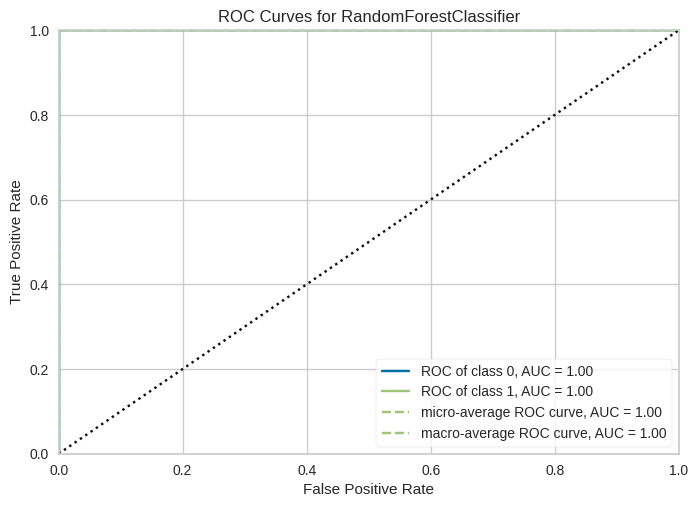

In [32]:
plot_model(final_rf_model, plot = 'auc')

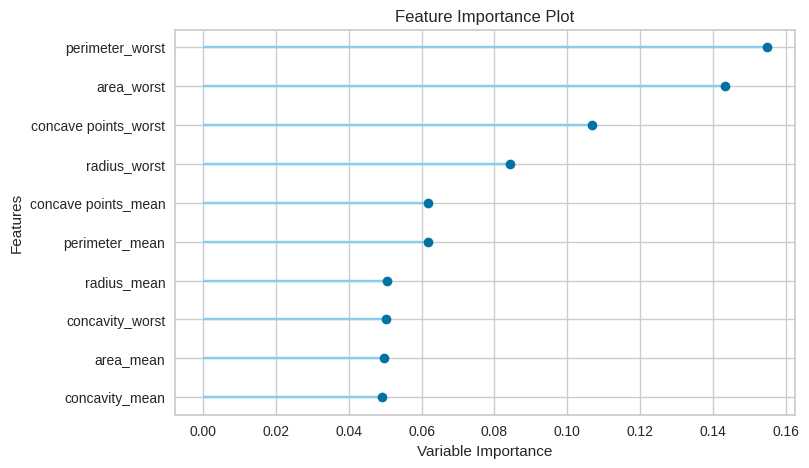

In [33]:
plot_model(final_rf_model, plot = 'feature')

In [ ]:
GRADIO

In [31]:
create_app(final_rf_model)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f31a05885f77839633.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
